In [2]:
# LIBRERIAS
import matplotlib
import numpy as np
import matplotlib.pylab as plt
from numpy import linalg as LA
%matplotlib inline 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

#plt.style.use('Solarize_light2')
import seaborn as sns
sns.set_theme()

# Method 1D

In [20]:
a=1 #Periodicity
er2=4
er1=12.25
da=0.8
nx=100
deltax=a/nx
x=np.arange(0,a+deltax,deltax)
kx= np.linspace(-np.pi/a,np.pi/a,nx+1)

def y(x): #Dielectric function
    s=np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<(a-da):
            s[i]=er1
        else:
            s[i]=er2
            
    return np.array(s)



In [29]:
D_matrix=np.zeros((nx,nx),dtype=complex)

omega=np.zeros((nx,len(kx)))
e=y(x)

for l in range(len(kx)):

    def delta(i,j):
        if i==-1: return np.exp(-1j*kx[l]*a)*delta(nx-1,j)
        if i==nx: return np.exp(1j*kx[l]*a)*delta(0,j)
        if i!=j: return 0
        else: return 1

    for i in range(0,nx):

        for j in range(0,nx):

            D_matrix[i,j]=1/e[j]*(delta(i+1,j)-2*delta(i,j)+delta(i-1,j))/deltax**2

        
  
    w, v = LA.eig(D_matrix)
    w=np.sort((np.sqrt(np.abs(w))))
    for m in range(len(w)):
        omega[m,l]=w[m]
    

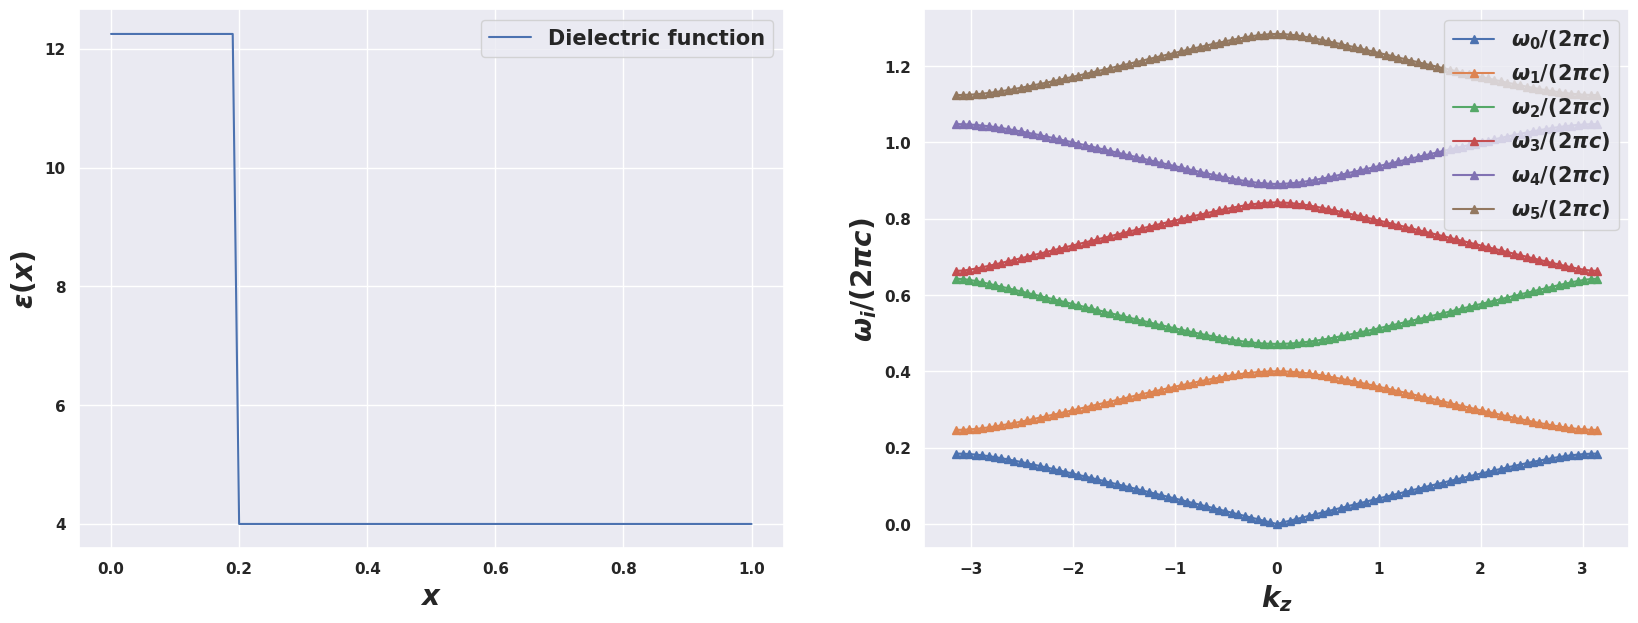

In [30]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(x,e,label='Dielectric function')
plt.xlabel('$x$',size=20)
plt.ylabel(r'$\epsilon(x)$',size=20)
plt.legend(fontsize=15)

plt.subplot(1,2,2)
for i in range(0,6):
    plt.plot(kx,omega[i,:]/(2*np.pi),marker='^',label=r'$\omega_{'+str(i)+'}/(2\pi c)$')

plt.xlabel('$k_{z}$',size=20)
plt.ylabel(r'$\omega_{i}/(2\pi c)$',size=20)
plt.legend(fontsize=15)

# 1D Defect mode

In [11]:
nx=200 # Number of sample points
er2=4  # Dielectric value 2
er1=12.25  # Dielectric value 1
a=1 
L=20 #  half of the total len of the lattice
deltax=2*L/nx # Sample size
defec=1.5*a # size of the deffect
x=np.arange(-L,L+deltax,deltax) # spatial sampling
kx= np.linspace(-np.pi/(a),np.pi/(a),len(x)) #  wave vector sampling


def periodicf(lid,lfd,f,x):
    if x>=lid and x<=lfd :
        return er1
    if ((x>=lfd and x<=(lfd+2*a)) or (x<=lid and x>=(lid-2*a))) :
        return f(x)
    elif x>(lfd+2*a):
        x_new=x-(2*a)
        return periodicf(li,lf,f,x_new)
    elif x<(lid-2*a):
        
        x_new=x+(2*a)
        return periodicf(li,lf,f,x_new)
    
def squareP(li,lf,x):
    return periodicf(li,lf,square,x)
 
# Non-periodic square wave function defined for a range [-l,l]
def square(x):
    if abs(x)>(lf+a):
        return er1
    else:
        return er2

li = -1.5*a/2
lf = 1.5*a/2
e = [squareP(li,lf,xi) for xi in x]  #Dielectric function


Text(0, 0.5, '$\\epsilon(x)$')

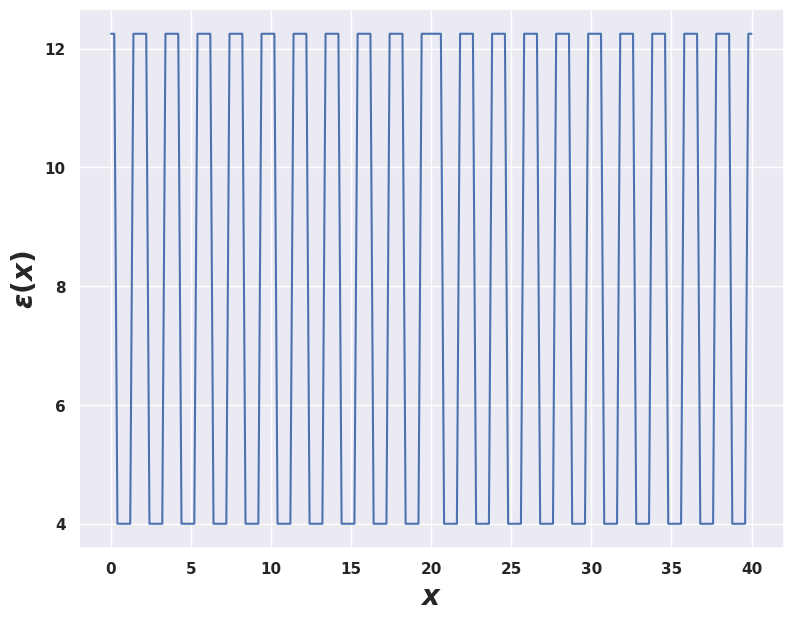

In [13]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(x+20,e)
plt.xlabel('$x$',size=20)
plt.ylabel(r'$\epsilon(x)$',size=20)


In [4]:
D_matrix=np.zeros((nx,nx),dtype=complex)

omega=np.zeros((nx,len(kx)))

for l in range(len(kx)):

    def delta(i,j):
        if i==-1: return np.exp(-1j*kx[l]*a)*delta(nx-1,j)
        if i==nx: return np.exp(1j*kx[l]*a)*delta(0,j)
        if i!=j: return 0
        else: return 1

    for i in range(0,nx):

        for j in range(0,nx):

            D_matrix[i,j]=1/e[j]*(delta(i+1,j)-2*delta(i,j)+delta(i-1,j))/deltax**2

    w, v = LA.eig(D_matrix)
    w=np.sort((np.sqrt(np.abs(w))))
    for m in range(len(w)):
        omega[m,l]=w[m]
    

Text(0, 0.5, '$\\omega_{i}/(2\\pi c)$')

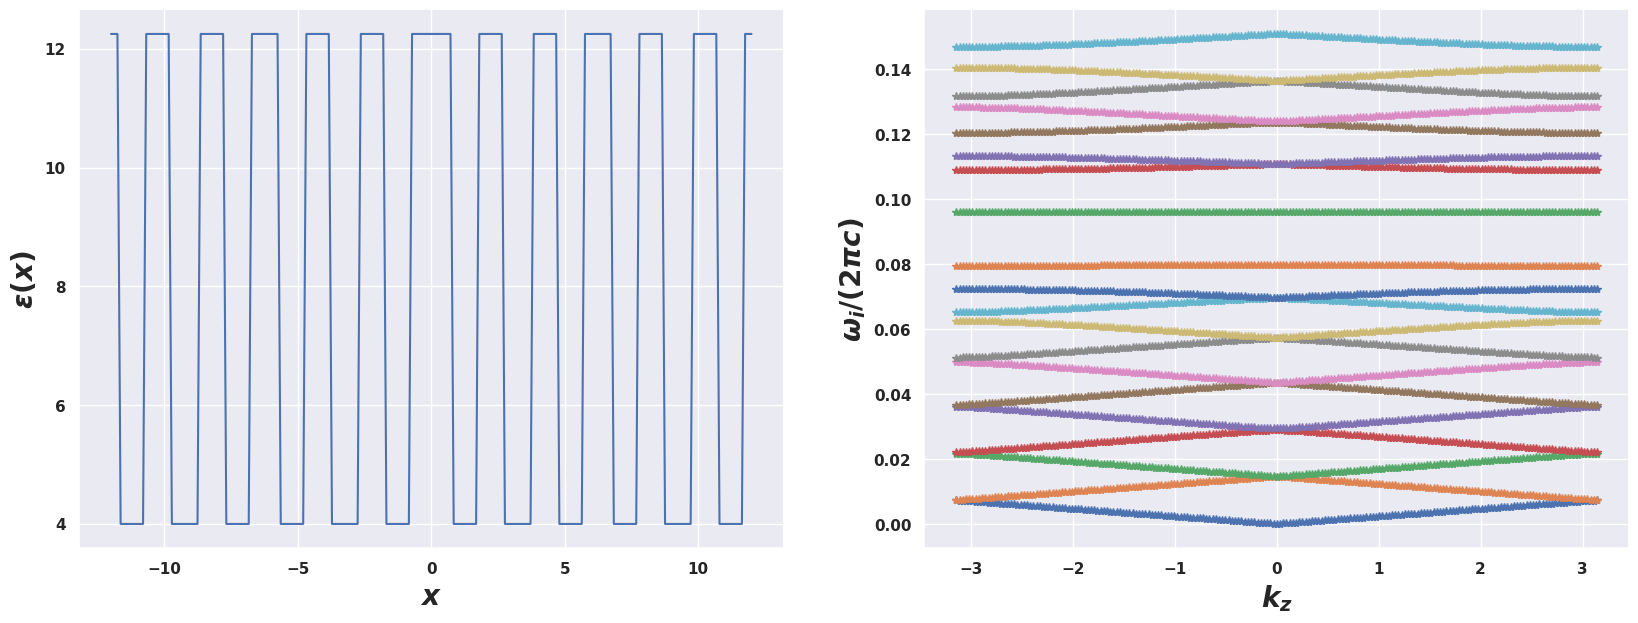

In [6]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(x,e)
plt.xlabel('$x$',size=20)
plt.ylabel(r'$\epsilon(x)$',size=20)


plt.subplot(1,2,2)
for i in range(0,20):
    plt.plot(kx,omega[i,:]/(2*np.pi),marker='*')

plt.xlabel('$k_{z}$',size=20)
plt.ylabel(r'$\omega_{i}/(2\pi c)$',size=20)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animationfig = plt.figure()
ax1 = plt.subplot(1,1,1)
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 6)
title = ax1.set_title('')
line1, = ax1.plot([], [], "k--")
line2, = ax1.plot([], [])
def init():
    line1.set_data(x, V * 0.01)
    return line1,def animate(i):
    line2.set_data(x, np.abs(sol.y[:,i])**2)
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line1,anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(sol.t), interval=50,                 
                               blit=True)# Save the animation into a short video
anim.save('sho.mp4', fps=15, 
          extra_args=['-vcodec', 'libx264'], dpi=600)